In [3]:
import tensorflow as tf
import torch as pt
import keras as k
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print("Tensorflow version: ",tf.__version__)
print("Pytorch  version: ",pt.__version__)
print("Keras  version: ",k.__version__)

Tensorflow version:  2.18.0
Pytorch  version:  2.5.1+cpu
Keras  version:  3.8.0


In [18]:
#To build an ANN model to convert temp to degree Celsius to Fahrenheit

x=np.array([-40, -10, 0, 8, 15, 22, 38], dtype='float32')
y=np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype='float32')
model=Sequential([
    Dense(units=4, activation='sigmoid'),
    Dense(units=1, activation='sigmoid')
])
model.compile(loss='mean_squared_error')
model.fit(x,y,epochs=10)

temp_c=int(input("enter temp in C: "))

prediction=model.predict(np.array([temp_c]))

print("predicted output: ",prediction[0][0])



Epoch 1/10


ValueError: Input 0 of layer "dense_14" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)

In [22]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a dataset of Celsius to Fahrenheit conversions
celsius = np.array([0, 20, 30, 40, 100], dtype=float)  # Temperatures in Celsius
fahrenheit = np.array([32, 68, 86, 104, 212], dtype=float)  # Corresponding Fahrenheit values

# Build the ANN model
model = Sequential([
    Dense(units=1, input_shape=[1], activation='sigmoid')  # Single input and output, with 1 neuron
])

# Compile the model
model.compile(loss='mean_squared_error')

# Train the model
print("Training the model...")
history = model.fit(celsius, fahrenheit, epochs=500, verbose=0)  # 500 epochs for simplicity

# Test the model with new data
print("\nTesting the model...")
test_temp = np.array([37.0], dtype=float)  # Example temperature in Celsius
predicted_f = model.predict(test_temp)
print(f"{test_temp[0]}°C is approximately {predicted_f[0][0]:.2f}°F")


Training the model...

Testing the model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
37.0°C is approximately 1.00°F


In [26]:
#To build an ANN model on classification problem on Breast cancer classification
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = 'breast-cancer.csv'  # Replace with your file path if needed
data = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())

# Preprocessing the data
# Assuming the target column is 'diagnosis' (adjust as per your dataset)
target_column = 'diagnosis'  # Change this if needed
X = data.drop(target_column, axis=1)
y = data[target_column]

# Encode target labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts 'M', 'B', etc. to numeric classes
y = to_categorical(y)  # Convert to one-hot encoding for ANN classification

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(y.shape[1], activation='softmax')  # Output layer (softmax for multi-class classification)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("\nTraining the model...")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
print("\nEvaluating the model on test data...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on new data
predictions = model.predict(X_test[:5])
print("\nSample Predictions:")
print(predictions)

Dataset Head:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_w

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7589 - loss: 0.5781 - val_accuracy: 0.8681 - val_loss: 0.4021
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9076 - loss: 0.3833 - val_accuracy: 0.9231 - val_loss: 0.2754
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9309 - loss: 0.2449 - val_accuracy: 0.9451 - val_loss: 0.2117
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9541 - loss: 0.1802 - val_accuracy: 0.9451 - val_loss: 0.1804
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9493 - loss: 0.1430 - val_accuracy: 0.9451 - val_loss: 0.1614
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9534 - loss: 0.1296 - val_accuracy: 0.9451 - val_loss: 0.1505
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9791 - loss: 0.0997 - val_accuracy: 0.9451 - val_loss: 0.1429
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9792 - loss: 0.0988 - val_accuracy: 0.9451 - val_loss: 0.

Dataset Head:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_w

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4094 - loss: 0.9206 - val_accuracy: 0.6154 - val_loss: 0.6164
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6049 - loss: 0.6389 - val_accuracy: 0.9121 - val_loss: 0.4425
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8046 - loss: 0.4803 - val_accuracy: 0.9121 - val_loss: 0.3435
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8817 - loss: 0.3703 - val_accuracy: 0.9231 - val_loss: 0.2846
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8962 - loss: 0.3303 - val_accuracy: 0.9231 - val_loss: 0.2429
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9109 - loss: 0.2583 - val_accuracy: 0.9231 - val_loss: 0.2122
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9091 - loss: 0.2525 - val_accuracy: 0.9560 - val_loss: 0.1887
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9300 - loss: 0.2353 - val_accuracy: 0.9451 - val_loss: 0.

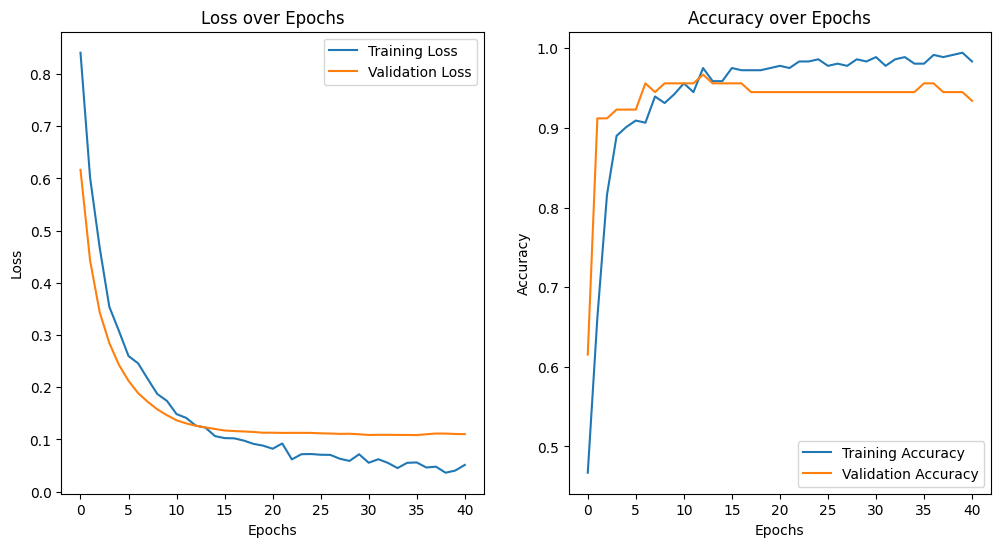

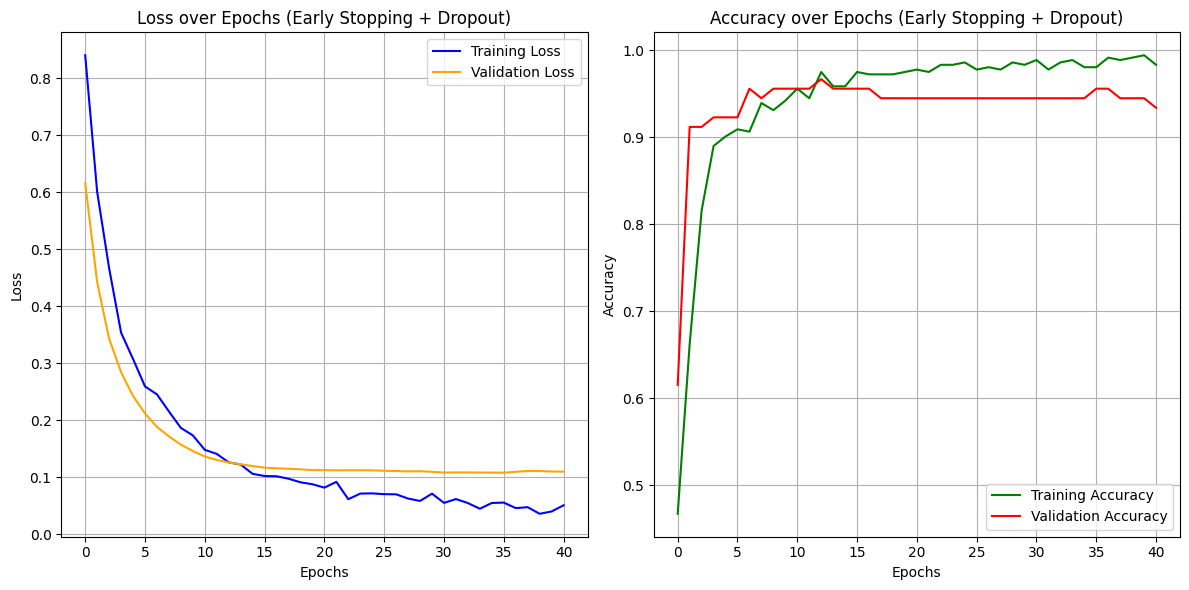

In [3]:
#Exp 3
#Building ANN for breast cancer classification to see the effects of Early stopping and Dropouts
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = 'breast-cancer.csv'  # Replace with your file path if needed
data = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())

# Preprocessing the data
# Assuming the target column is 'diagnosis' (adjust as per your dataset)
target_column = 'diagnosis'  # Change this if needed
X = data.drop(target_column, axis=1)
y = data[target_column]

# Encode target labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts 'M', 'B', etc. to numeric classes
y = to_categorical(y)  # Convert to one-hot encoding for ANN classification

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the ANN model with Dropout layers
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.2),  # Dropout layer (20% dropout rate)
    Dense(16, activation='relu'),  # Hidden layer
    Dropout(0.2),  # Dropout layer (20% dropout rate)
    Dense(y.shape[1], activation='softmax')  # Output layer (softmax for multi-class classification)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
print("\nTraining the model...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],  # Add Early Stopping
    verbose=1
)

# Evaluate the model
print("\nEvaluating the model on test data...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on new data
predictions = model.predict(X_test[:5])
print("\nSample Predictions:")
print(predictions)

# Plot training history for loss and accuracy
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss over Epochs (Early Stopping + Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy over Epochs (Early Stopping + Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [5]:
# Exp 4

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Generate synthetic churn dataset
np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 10)  # 10 numerical features
y = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # 70% non-churn, 30% churn

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to create the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracies = []

for train_index, test_index in kfold.split(X_scaled, y):
    print(f"Training Fold {fold_no}...")
    
    # Split data into train and test sets for this fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create a fresh model for each fold
    model = create_model()
    
    # Set up checkpoint to save the best model during training
    checkpoint = ModelCheckpoint(
        f"best_model_fold_{fold_no}.h5",
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        validation_split=0.2,
        callbacks=[checkpoint],
        verbose=1
    )
    
    # Load the best saved model for this fold
    model.load_weights(f"best_model_fold_{fold_no}.h5")
    
    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold_no} Accuracy: {acc:.4f}\n")
    fold_no += 1

# Print overall results
print(f"Average Accuracy across folds: {np.mean(accuracies):.4f}")


Training Fold 1...
Epoch 1/20


C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/20 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5312 - loss: 0.6844
Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to best_model_fold_1.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5448 - loss: 0.6796 - val_accuracy: 0.7000 - val_loss: 0.6215
Epoch 2/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7188 - loss: 0.6234
Epoch 2: val_accuracy did not improve from 0.70000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6876 - loss: 0.6416 - val_accuracy: 0.6938 - val_loss: 0.6245
Epoch 3/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6875 - loss: 0.5508
Epoch 3: val_accuracy did not improve from 0.70000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6947 - loss: 0.6114 - val_accuracy: 0.6938 - val_loss: 0.6292
Epoch 4/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6250 - loss: 0.5896
Epoch 4: val_accuracy did not improve from 0.70000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6772 - loss: 0.6193 - val_accuracy: 0.6938 - val_loss: 0.6327
Epoch 5/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9062 - loss: 0.4676
Epoch 5: val_accuracy did not improve from 0.7

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/20 ━━━━━━━━━━━━━━━━━━━━ 18s 970ms/step - accuracy: 0.6562 - loss: 0.6447
Epoch 1: val_accuracy improved from -inf to 0.73125, saving model to best_model_fold_2.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6613 - loss: 0.6324 - val_accuracy: 0.7312 - val_loss: 0.5953
Epoch 2/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6562 - loss: 0.6234
Epoch 2: val_accuracy did not improve from 0.73125
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6500 - loss: 0.6503 - val_accuracy: 0.7312 - val_loss: 0.5981
Epoch 3/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7812 - loss: 0.5438
Epoch 3: val_accuracy did not improve from 0.73125
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6880 - loss: 0.6210 - val_accuracy: 0.7312 - val_loss: 0.5984
Epoch 4/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.5888
Epoch 4: val_accuracy did not improve from 0.73125
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7095 - loss: 0.6067 - val_accuracy: 0.7312 - val_loss: 0.6033
Epoch 5/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8750 - loss: 0.4757
Epoch 5: val_accuracy did not improve from 0.7

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6844 - loss: 0.6077 - val_accuracy: 0.7375 - val_loss: 0.6221
Epoch 12/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7812 - loss: 0.5579
Epoch 12: val_accuracy did not improve from 0.73750
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7160 - loss: 0.5918 - val_accuracy: 0.7375 - val_loss: 0.6249
Epoch 13/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7812 - loss: 0.5439
Epoch 13: val_accuracy did not improve from 0.73750
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7051 - loss: 0.5907 - val_accuracy: 0.7375 - val_loss: 0.6263
Epoch 14/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7188 - loss: 0.6478
Epoch 14: val_accuracy did not improve from 0.73750
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6893 - loss: 0.6106 - val_accuracy: 0.7375 - val_loss: 0.6257
Epoch 15/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5625 - loss: 0.7364
Epoch 15: val_accuracy did not improve f

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/20 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5312 - loss: 0.6987
Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to best_model_fold_3.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5441 - loss: 0.6934 - val_accuracy: 0.7000 - val_loss: 0.6035
Epoch 2/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6250 - loss: 0.6935
Epoch 2: val_accuracy improved from 0.70000 to 0.71250, saving model to best_model_fold_3.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6763 - loss: 0.6363 - val_accuracy: 0.7125 - val_loss: 0.5887
Epoch 3/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6562 - loss: 0.6129
Epoch 3: val_accuracy did not improve from 0.71250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6876 - loss: 0.6165 - val_accuracy: 0.7125 - val_loss: 0.5917
Epoch 4/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6875 - loss: 0.6404
Epoch 4: val_accuracy did not improve from 0.71250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6852 - loss: 0.6282 - val_accuracy: 0.7125 - val_loss: 0.5946
Epoch 5/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7500 - loss: 0.6207
Epoch 5: val_accuracy did not improve from 0.71250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6868 - loss: 0.6434 - val_accuracy: 0.7125 - val_loss: 0.6004
Epoch 6/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.7188 - loss: 0.6425
Epoch 6: val_accuracy did not improve from 0.71

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Fold 3 Accuracy: 0.6900

Training Fold 4...
Epoch 1/20


C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/20 ━━━━━━━━━━━━━━━━━━━━ 15s 791ms/step - accuracy: 0.6250 - loss: 0.6666
Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to best_model_fold_4.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6331 - loss: 0.6637 - val_accuracy: 0.7000 - val_loss: 0.6186
Epoch 2/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8750 - loss: 0.5332
Epoch 2: val_accuracy did not improve from 0.70000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6953 - loss: 0.6257 - val_accuracy: 0.7000 - val_loss: 0.6176
Epoch 3/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7812 - loss: 0.5788
Epoch 3: val_accuracy did not improve from 0.70000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7062 - loss: 0.6150 - val_accuracy: 0.7000 - val_loss: 0.6226
Epoch 4/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6875 - loss: 0.6292
Epoch 4: val_accuracy did not improve from 0.70000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6857 - loss: 0.6055 - val_accuracy: 0.7000 - val_loss: 0.6246
Epoch 5/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7188 - loss: 0.5669
Epoch 5: val_accuracy did not improve from 0.7

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Fold 4 Accuracy: 0.6900

Training Fold 5...
Epoch 1/20


C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/20 ━━━━━━━━━━━━━━━━━━━━ 18s 956ms/step - accuracy: 0.5000 - loss: 0.7033
Epoch 1: val_accuracy improved from -inf to 0.71875, saving model to best_model_fold_5.h5


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5061 - loss: 0.7128 - val_accuracy: 0.7188 - val_loss: 0.6317
Epoch 2/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6875 - loss: 0.6711
Epoch 2: val_accuracy did not improve from 0.71875
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6798 - loss: 0.6554 - val_accuracy: 0.7188 - val_loss: 0.6206
Epoch 3/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5938 - loss: 0.6524
Epoch 3: val_accuracy did not improve from 0.71875
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6409 - loss: 0.6503 - val_accuracy: 0.7125 - val_loss: 0.6183
Epoch 4/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5938 - loss: 0.7379
Epoch 4: val_accuracy did not improve from 0.71875
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7072 - loss: 0.6247 - val_accuracy: 0.7125 - val_loss: 0.6148
Epoch 5/20
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6562 - loss: 0.6417
Epoch 5: val_accuracy did not improve from 0.7

<h1>
    exp 5 & 6
</h1>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8543 - loss: 0.4498 - val_accuracy: 0.9842 - val_loss: 0.0585
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9741 - loss: 0.0818 - val_accuracy: 0.9855 - val_loss: 0.0482
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9824 - loss: 0.0555 - val_accuracy: 0.9876 - val_loss: 0.0440
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9854 - loss: 0.0456 - val_accuracy: 0.9905 - val_loss: 0.0338
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9876 - loss: 0.0393 - val_accuracy: 0.9902 - val_loss: 0.0334
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9893 - loss: 0.0331 - val_accuracy: 0.9896 - val_loss: 0.0388
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9894 - loss: 0.0322 - val_accuracy: 0.9887 - val_loss: 0.0390
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9918 -

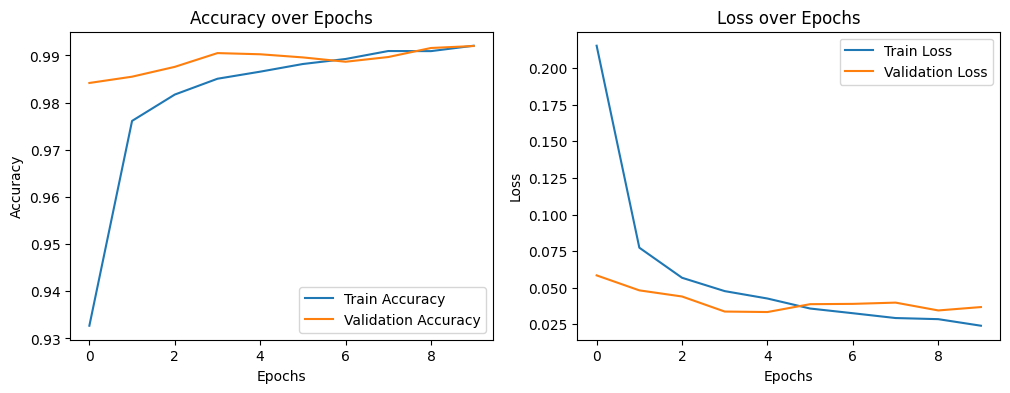

Model saved as 'mnist_cnn_model.h5'


In [1]:
#exp 5
# To perform convolutional neural network for image classification on MNIST Dataset
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
# Reshape the data to include a channel dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize the pixel values to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)  # 10 classes for digits 0-9
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the model
model.save("mnist_cnn_model.h5")
print("Model saved as 'mnist_cnn_model.h5'")

In [14]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set dataset paths (Update these paths as per your system)
train_dir = 'dog-cat-full-dataset-master/dog-cat-full-dataset-master/data/train'
validation_dir = 'dog-cat-full-dataset-master/dog-cat-full-dataset-master/data/validation'

# Check if paths exist
assert os.path.exists(train_dir), f"{train_dir} does not exist!"
assert os.path.exists(validation_dir), f"{validation_dir} does not exist!"

# Preprocessing the data using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values
    rotation_range=20,          # Randomly rotate images
    width_shift_range=0.2,      # Randomly shift images horizontally
    height_shift_range=0.2,     # Randomly shift images vertically
    shear_range=0.2,            # Randomly shear images
    zoom_range=0.2,             # Randomly zoom images
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest'         # Fill missing pixels
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'      # Binary classification: cat vs dog
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Define callbacks
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', save_best_only=True, monitor='val_loss', mode='min'
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True, monitor='val_loss', mode='min'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


AssertionError: dog-cat-full-dataset-master/dog-cat-full-dataset-master/data/train does not exist!

<h1>10-02-2025</h1>

In [ ]:
#exp 6 and 7


<h1>18 March 2025</h1>

In [3]:
#experiment 17
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Downloading necessary resources
nltk.download('punkt')
nltk.download('punkt_tab')

# Sample text data
text = "Natural Language Processing is fascinating. It allows computers to understand human language."

# Tokenization
tokens = word_tokenize(text)
print("Tokens:", tokens)

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]
print("Stemmed Tokens:", stemmed_tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\paras\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


Tokens: ['Natural', 'Language', 'Processing', 'is', 'fascinating', '.', 'It', 'allows', 'computers', 'to', 'understand', 'human', 'language', '.']
Stemmed Tokens: ['natur', 'languag', 'process', 'is', 'fascin', '.', 'it', 'allow', 'comput', 'to', 'understand', 'human', 'languag', '.']


<h1>24 March 2025</h1>

In [1]:
#exp 18 lemmatization
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Sample text data
text = "Natural Language Processing is fascinating. It allows computers to understand human language."

# Tokenization
tokens = word_tokenize(text)
print("Tokens:", tokens)

# Removing Stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
print("Filtered Tokens (Stopwords Removed):", filtered_tokens)

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
print("Lemmatized Tokens:", lemmatized_tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paras\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paras\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\paras\AppData\Roaming\nltk_data...


Tokens: ['Natural', 'Language', 'Processing', 'is', 'fascinating', '.', 'It', 'allows', 'computers', 'to', 'understand', 'human', 'language', '.']
Filtered Tokens (Stopwords Removed): ['Natural', 'Language', 'Processing', 'fascinating', '.', 'allows', 'computers', 'understand', 'human', 'language', '.']
Lemmatized Tokens: ['Natural', 'Language', 'Processing', 'fascinating', '.', 'allows', 'computer', 'understand', 'human', 'language', '.']


In [4]:
#using spacy
import spacy

# Load the spacy model (make sure to download it first using: python -m spacy download en_core_web_sm)
nlp = spacy.load('en_core_web_sm')

# Sample text data
text = "Natural Language Processing is fascinating. It allows computers to understand human language."

# Process the text data with spaCy
doc = nlp(text)

# Remove stopwords and perform lemmatization
filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# Display the filtered and lemmatized tokens
print("Filtered and Lemmatized Tokens:", filtered_tokens)

Filtered and Lemmatized Tokens: ['Natural', 'Language', 'processing', 'fascinating', 'allow', 'computer', 'understand', 'human', 'language']


<h1>25 March 2025</h1>

In [1]:
#exp 20
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample text data
corpus = [
    "Natural Language Processing is a fascinating field of AI.",
    "Bag-of-Words and N-Grams are important techniques in NLP.",
    "Machine Learning models process text data using vectorization.",
    "My name is Paras and i am in Btech CSE."
]

# 1. Bag-of-Words Using CountVectorizer
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(corpus)
print("Bag-of-Words (BoW) representation:\n", bow_matrix.toarray())
print("Feature Names:", bow_vectorizer.get_feature_names_out())

# 2. Bag-of-n-grams Using CountVectorizer (Bi-grams)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = bigram_vectorizer.fit_transform(corpus)
print("\nBag-of-N-Grams (Bi-grams) representation:\n", bigram_matrix.toarray())
print("Bi-gram Feature Names:", bigram_vectorizer.get_feature_names_out())

# 3. Bag-of-Words Using Tf-Idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
print("\nTF-IDF representation:\n", tfidf_matrix.toarray())
print("TF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())

Bag-of-Words (BoW) representation:
 [[1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0]
 [0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0]]
Feature Names: ['ai' 'am' 'and' 'are' 'bag' 'btech' 'cse' 'data' 'fascinating' 'field'
 'grams' 'important' 'in' 'is' 'language' 'learning' 'machine' 'models'
 'my' 'name' 'natural' 'nlp' 'of' 'paras' 'process' 'processing'
 'techniques' 'text' 'using' 'vectorization' 'words']

Bag-of-N-Grams (Bi-grams) representation:
 [[0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0]
 [1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0]]
Bi-gram Feature Names: ['am in' 'and am' 'and grams' 'are important' 'bag of' 'btech cse'
 'data using' 'fascinating fie

<h1>08-04-2025</h1>

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0341
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.7726e-04
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.4522e-04  
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.4775e-04
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.2039e-04
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8486e-04
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.1323e-04
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3330e-04 
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.0925e-04 
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9295e-04 
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0021e-04 
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.4391e-04 
Epoch 13/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5942e-04 
Epoch 14/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6934e-04 
Epoch 15/2

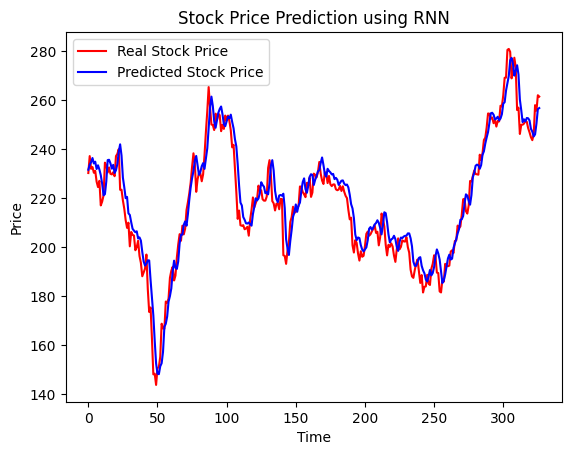

In [1]:
#exp 15: To implement RNN model for stock price prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

# Load stock price data (CSV should contain a 'Close' column)
data = pd.read_csv('Tesla.csv')  # Replace with your CSV file
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(close_prices)

# Create sequences for RNN
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_prices, sequence_length)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test)

# Plot the results
plt.plot(real_prices, color='red', label='Real Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

<h1>16 April 2025</h1>

C:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.2165 - val_loss: 0.0124
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0067 - val_loss: 0.0100
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0045 - val_loss: 0.0089
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0041 - val_loss: 0.0074
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0034 - val_loss: 0.0064
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.4774e-04 - val_loss: 0.0035
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss:

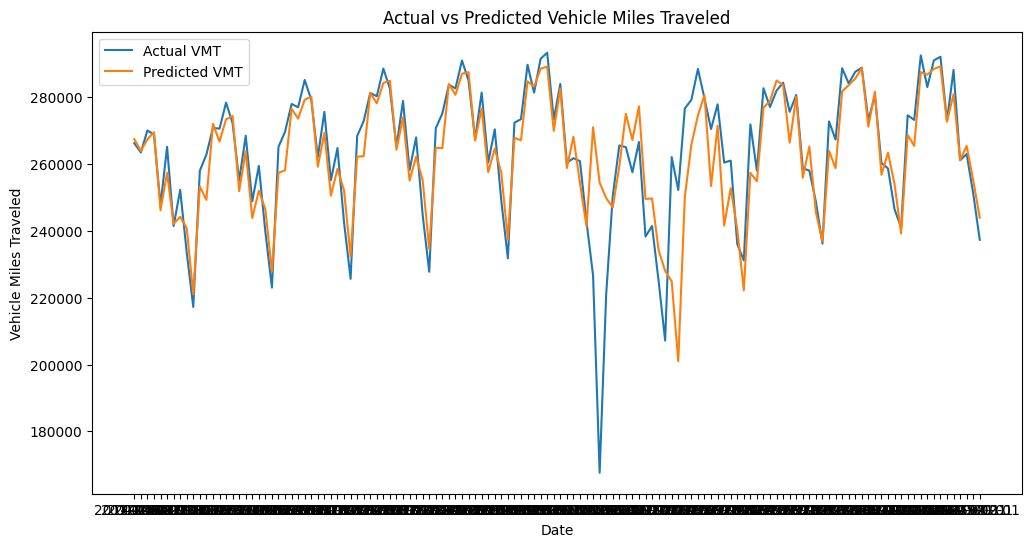

In [5]:
#exp 14:to build using rnn miles travelled by vehicle prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
df = pd.read_csv("C:/Users/paras/Downloads/TRFVOLUSM227NFWA.csv")  # Ensure the CSV file is in the working directory
df['observation_data'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df['Normalized'] = scaler.fit_transform(df[['TRFVOLUSM227NFWA']])

# Prepare sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 12  # Using past 12 months to predict the next month
data = df['Normalized'].values
X, y = create_sequences(data, sequence_length)

# Reshape input to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_actual, label='Actual VMT')
plt.plot(df.index[-len(y_test):], predictions, label='Predicted VMT')
plt.xlabel('Date')
plt.ylabel('Vehicle Miles Traveled')
plt.title('Actual vs Predicted Vehicle Miles Traveled')
plt.legend()
plt.show()
